In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

In [2]:
TCLab = tclab.setup(connected= True) #False, speedup=100)

base_unit = 60 #Hour
spans = 6

run_time = base_unit*spans
setpoint = 30

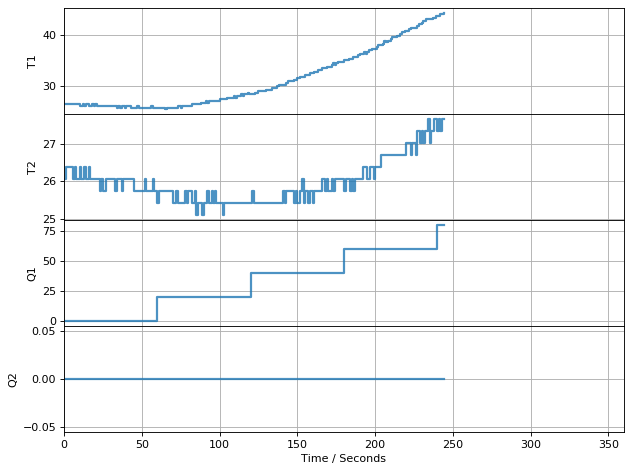

In [ ]:
with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = 0
    for t in tclab.clock(run_time):
        if t%(base_unit)==0 and t>0:
            q_test+=20
        lab.Q1(q_test)
        tcplot.update(t)

In [ ]:
h.get_sessions()

In [ ]:
h.load_session(1)

In [ ]:
data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [ ]:
data_frame = pandas.DataFrame(data = data)
data_frame.to_csv()

In [ ]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict['T1'], [2, 4, 100, 50])
[K, tau, theta, y0]

In [ ]:
for span in range(spans):
    lower = span*base_unit
    upper = (span+1)*base_unit
    print (upper)
    
    print (numpy.array(h.t[lower:upper])-h.t[lower])
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict['T1'][lower:upper], [2, 4, 100, 50])
    print([K, tau, theta, y0])
    
    print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
#     plt.plot(h.t, h.logdict['T1'])
#     plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))

In [ ]:
plt.plot(h.t, h.logdict['T1'])
plt.plot(h.t, fopdt(h.t, K, tau, theta, y0))